<a href="https://colab.research.google.com/github/clzndyal1/git_test/blob/master/14_Deep_Learning_Performance_Improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#모델성능 향상시키기
# 와인 자료 활용 -> 레드와인, 화이트와인 예측

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv')

df.head()  #마지막 속성이 클래스

fatal: destination path 'data' already exists and is not an empty directory.


,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
X = df.iloc[:,0:-1]  #클래스를 결정하는 속성 분리
y = df.iloc[:,-1]   #클래스 분리

In [ ]:
#데이터를 학습데이터의 테스트 데이터로 분리 -> train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))   #input_layer_1
model.add(Dense(12, activation='relu'))  #layer_2
model.add(Dense(8, activation='relu'))  #layer_3
model.add(Dense(1, activation='sigmoid'))  #layer_4
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델을 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)  #0.8 *0.25 = 0.2

#테스트 결과를 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy :', score[1])

Epoch 1/50
8/8 [==============================] - 2s 60ms/step - loss: 6.0684 - accuracy: 0.1958 - val_loss: 0.9503 - val_accuracy: 0.4927
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 0.8381 - accuracy: 0.7072 - val_loss: 1.0256 - val_accuracy: 0.7606
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 1.1493 - accuracy: 0.7547 - val_loss: 1.1456 - val_accuracy: 0.7606
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 1.1344 - accuracy: 0.7547 - val_loss: 0.9958 - val_accuracy: 0.7606
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.9231 - accuracy: 0.7544 - val_loss: 0.7269 - val_accuracy: 0.7606
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.6387 - accuracy: 0.7583 - val_loss: 0.4735 - val_accuracy: 0.7868
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4486 - accuracy: 0.7937 - val_loss: 0.4332 - val_accuracy: 0.7898
Epoch 8/50
8/8 [============

In [ ]:
modelpath = './data/model/all{epoch:02d}-{val_accuracy:.4f}.hdf5'

In [ ]:
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [ ]:
#모델을 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])  #0.8 *0.25 = 0.2

#테스트 결과를 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy :', score[1])


Epoch 1: saving model to ./data/model/all01-0.9261.hdf5

Epoch 2: saving model to ./data/model/all02-0.9261.hdf5

Epoch 3: saving model to ./data/model/all03-0.9261.hdf5

Epoch 4: saving model to ./data/model/all04-0.9261.hdf5

Epoch 5: saving model to ./data/model/all05-0.9276.hdf5

Epoch 6: saving model to ./data/model/all06-0.9269.hdf5

Epoch 7: saving model to ./data/model/all07-0.9269.hdf5

Epoch 8: saving model to ./data/model/all08-0.9276.hdf5

Epoch 9: saving model to ./data/model/all09-0.9276.hdf5

Epoch 10: saving model to ./data/model/all10-0.9276.hdf5

Epoch 11: saving model to ./data/model/all11-0.9276.hdf5

Epoch 12: saving model to ./data/model/all12-0.9276.hdf5

Epoch 13: saving model to ./data/model/all13-0.9284.hdf5

Epoch 14: saving model to ./data/model/all14-0.9284.hdf5

Epoch 15: saving model to ./data/model/all15-0.9284.hdf5

Epoch 16: saving model to ./data/model/all16-0.9284.hdf5

Epoch 17: saving model to ./data/model/all17-0.9284.hdf5

Epoch 18: saving model

In [ ]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.1293 - accuracy: 0.9546 - val_loss: 0.1434 - val_accuracy: 0.9477
Epoch 2/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1281 - accuracy: 0.9523 - val_loss: 0.1405 - val_accuracy: 0.9446
Epoch 3/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1266 - accuracy: 0.9546 - val_loss: 0.1399 - val_accuracy: 0.9484
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1250 - accuracy: 0.9543 - val_loss: 0.1377 - val_accuracy: 0.9469
Epoch 5/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1233 - accuracy: 0.9554 - val_loss: 0.1380 - val_accuracy: 0.9477
Epoch 6/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1230 - accuracy: 0.9554 - val_loss: 0.1355 - val_accuracy: 0.9500
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1212 - accuracy: 0.9566 - val_loss: 0.1345 - val_accuracy: 0.9500
Epoch 8/2000
8/8

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.129280,0.954580,0.143387,0.947652
1,0.128060,0.952271,0.140472,0.944573
2,0.126600,0.954580,0.139869,0.948422
3,0.124986,0.954324,0.137697,0.946882
4,0.123326,0.955350,0.138046,0.947652
...,...,...,...,...
1995,0.021710,0.993585,0.061284,0.986913
1996,0.021738,0.993841,0.056921,0.986143
1997,0.022726,0.993585,0.058276,0.986913
1998,0.021553,0.993072,0.067454,0.985373


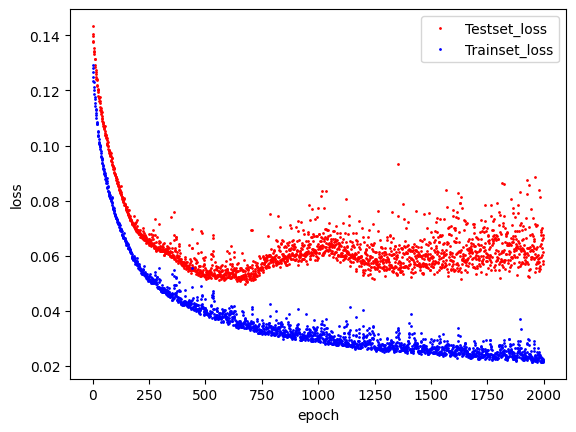

In [ ]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='r', markersize=1, label='Testset_loss')
plt.plot(x_len, y_loss, 'o', c='b', markersize=1, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
modelpath = './data/model/Ch14-4-bestmodel.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25,
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 0.0630 - val_accuracy: 0.9861
Epoch 2/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0628 - val_accuracy: 0.9869
Epoch 3/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0629 - val_accuracy: 0.9869
Epoch 4/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0222 - accuracy: 0.9941 - val_loss: 0.0669 - val_accuracy: 0.9838
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0219 - accuracy: 0.9936 - val_loss: 0.0635 - val_accuracy: 0.9861
Epoch 6/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0722 - val_accuracy: 0.9846
Epoch 7/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.9931 - val_loss: 0.0641 - val_accuracy: 0.9869
Epoch 8/2000
8/8

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9838
Test accuracy 0.983846127986908
